In [1]:
%load_ext jupyter_black
%load_ext autoreload
%autoreload 2

# Load experiment data

and there's a lot of it :)

## Sampling results (metadata)

In [2]:
import sqlite3

import pandas as pd

query = "SELECT * FROM `results`"
with sqlite3.connect("out/smpl.hm=p,hc=m,max/results.db") as db:
    df = pd.read_sql(query, db)

if "index" in df.columns:
    df.drop("index", axis=1, inplace=True)

df.drop(["ibmq_sid", "ibmq_jid", "backend", "n_shots", "jid"], axis=1, inplace=True)
df

,hid,reordering_jid,sampling_jid,simulation_jid
0,binaryoptimization/maxcut/biqmac/rudy-hams/4-p...,c526da35ecac0ae86205bd7713afac4cfc677629,00027acd1940a374c278491c771efc1c7853d2e5,c6e4100e66fd84aebdfd8ae22e1cb4d4ae47c850
1,binaryoptimization/maxcut/biqmac/rudy-hams/8-w...,9c1fe00249a67d0e0e5962d3e704f25ec9382df2,003690ae7988e1b17f793dba04e0071e56860ba4,9d3d6be3da6872e64b3a5fa417a0da6ca35d749a
2,binaryoptimization/maxcut/biqmac/rudy-hams/4-p...,e7aa23998e20fbf4b862b4eda4731b248061b173,0047d466f0ca026f99a4fb7c4186c1c5520fb1cc,682ccbae509c70b91bdf4b6fd923d64ca30fc5fe
3,binaryoptimization/maxcut/biqmac/rudy-hams/5-p...,0ff408beecb980c5528305d9246917ef6929a5cd,0056a70e06db855a20a9251b9abd299e8a34e6da,277bf9f0afc1d1782367c27db388aa2817380dd6
4,binaryoptimization/maxcut/biqmac/rudy-hams/1-p...,998d19dde3f4ea69da5aca46af6a4fd9e9b90102,008701f187e9981e318fc0b842d77a13d7765721,2b5323ef99cf23f58f7e9f9102e64f1b4f78a9ba
...,...,...,...,...
8466,binaryoptimization/maxcut/biqmac/rudy-hams/4-g...,09dc139f956f3e71aa2db0836b3f0e7e9921ac55,8f72e007cbd0393a89fcb9b80093463311c2322c,ecc2c0ef18f56587644d16e73fe38f756fff6e41
8467,binaryoptimization/maxcut/biqmac/ising-hams/9-...,0f30f9a3648f748c34120beb7e2e1f1c5ac7f10b,8f9cd4bcfd02f9c4b1f440aa88b215b0b7d07491,f06b299e7125fd1c1d343571b8a70f08b8f75e5c
8468,binaryoptimization/maxcut/biqmac/rudy-hams/6-p...,02ffe0c1abe886150374b72b18a1101164ca8b97,8fe78e5ce45758a3a83c2b36c0fc73fbf2fd3c34,f266c1dbbf2fc5fa4c5c34330872701c9d1dc099
8469,binaryoptimization/maxcut/biqmac/rudy-hams/8-p...,24861635db6ca8150d867f0a5d96be9c39a54495,8f779bd7e917273c2976e927d8063997b3897125,f2a467540e3769fc01c1ea6dcf26492eb8f50fd0


## Join with reordering results

In [3]:
query = "SELECT * FROM `results`"
with sqlite3.connect("out/reorder.hcs=m/results.db") as db:
    df2 = pd.read_sql(query, db)

df2.dropna(inplace=True)
df2.drop(["hid", "n_timesteps", "order", "trotterization"], axis=1, inplace=True)
df2.rename({"jid": "reordering_jid"}, axis=1, inplace=True)

df.set_index("reordering_jid", inplace=True)
df2.set_index("reordering_jid", inplace=True)
df = df.join(df2, how="inner")

df["time"] = df["reordering_time"] + df["synthesis_time"]
df.drop(["reordering_time", "synthesis_time"], axis=1, inplace=True)

df.reset_index(inplace=True)
df

,reordering_jid,hid,sampling_jid,simulation_jid,method,n_terms,n_qubits,depth,time
0,c526da35ecac0ae86205bd7713afac4cfc677629,binaryoptimization/maxcut/biqmac/rudy-hams/4-p...,00027acd1940a374c278491c771efc1c7853d2e5,c6e4100e66fd84aebdfd8ae22e1cb4d4ae47c850,misra_gries,8,99,40,2.211
1,9c1fe00249a67d0e0e5962d3e704f25ec9382df2,binaryoptimization/maxcut/biqmac/rudy-hams/8-w...,003690ae7988e1b17f793dba04e0071e56860ba4,9d3d6be3da6872e64b3a5fa417a0da6ca35d749a,misra_gries,8,95,25,1.924
2,e7aa23998e20fbf4b862b4eda4731b248061b173,binaryoptimization/maxcut/biqmac/rudy-hams/4-p...,0047d466f0ca026f99a4fb7c4186c1c5520fb1cc,682ccbae509c70b91bdf4b6fd923d64ca30fc5fe,misra_gries,9,74,45,2.528
3,0ff408beecb980c5528305d9246917ef6929a5cd,binaryoptimization/maxcut/biqmac/rudy-hams/5-p...,0056a70e06db855a20a9251b9abd299e8a34e6da,277bf9f0afc1d1782367c27db388aa2817380dd6,none,7,96,45,1.481
4,998d19dde3f4ea69da5aca46af6a4fd9e9b90102,binaryoptimization/maxcut/biqmac/rudy-hams/1-p...,008701f187e9981e318fc0b842d77a13d7765721,2b5323ef99cf23f58f7e9f9102e64f1b4f78a9ba,misra_gries,10,46,50,2.224
...,...,...,...,...,...,...,...,...,...
8466,09dc139f956f3e71aa2db0836b3f0e7e9921ac55,binaryoptimization/maxcut/biqmac/rudy-hams/4-g...,8f72e007cbd0393a89fcb9b80093463311c2322c,ecc2c0ef18f56587644d16e73fe38f756fff6e41,misra_gries,7,68,40,2.311
8467,0f30f9a3648f748c34120beb7e2e1f1c5ac7f10b,binaryoptimization/maxcut/biqmac/ising-hams/9-...,8f9cd4bcfd02f9c4b1f440aa88b215b0b7d07491,f06b299e7125fd1c1d343571b8a70f08b8f75e5c,saturation,10,64,35,2.649
8468,02ffe0c1abe886150374b72b18a1101164ca8b97,binaryoptimization/maxcut/biqmac/rudy-hams/6-p...,8fe78e5ce45758a3a83c2b36c0fc73fbf2fd3c34,f266c1dbbf2fc5fa4c5c34330872701c9d1dc099,misra_gries,10,81,50,2.534
8469,24861635db6ca8150d867f0a5d96be9c39a54495,binaryoptimization/maxcut/biqmac/rudy-hams/8-p...,8f779bd7e917273c2976e927d8063997b3897125,f2a467540e3769fc01c1ea6dcf26492eb8f50fd0,none,10,92,65,1.248


## Join with simulation results

In [4]:
query = "SELECT * FROM `results`"
with sqlite3.connect("out/run.aer.hm=p,hc=m,max/results.db") as db:
    df2 = pd.read_sql(query, db)

df2.drop(
    ["hid", "step", "ibmq_jid", "ibmq_sid", "backend", "reordering_jid"],
    axis=1,
    inplace=True,
)
df2.rename({"jid": "simulation_jid", "energy": "mae/e"}, axis=1, inplace=True)
df2 = df2.groupby("simulation_jid").max()

df.set_index("simulation_jid", inplace=True)
df = df.join(df2, how="inner")

df.reset_index(inplace=True)
df

,simulation_jid,reordering_jid,hid,sampling_jid,method,n_terms,n_qubits,depth,time,mae/e
0,c6e4100e66fd84aebdfd8ae22e1cb4d4ae47c850,c526da35ecac0ae86205bd7713afac4cfc677629,binaryoptimization/maxcut/biqmac/rudy-hams/4-p...,00027acd1940a374c278491c771efc1c7853d2e5,misra_gries,8,99,40,2.211,0.223025
1,9d3d6be3da6872e64b3a5fa417a0da6ca35d749a,9c1fe00249a67d0e0e5962d3e704f25ec9382df2,binaryoptimization/maxcut/biqmac/rudy-hams/8-w...,003690ae7988e1b17f793dba04e0071e56860ba4,misra_gries,8,95,25,1.924,0.219497
2,682ccbae509c70b91bdf4b6fd923d64ca30fc5fe,e7aa23998e20fbf4b862b4eda4731b248061b173,binaryoptimization/maxcut/biqmac/rudy-hams/4-p...,0047d466f0ca026f99a4fb7c4186c1c5520fb1cc,misra_gries,9,74,45,2.528,0.087551
3,277bf9f0afc1d1782367c27db388aa2817380dd6,0ff408beecb980c5528305d9246917ef6929a5cd,binaryoptimization/maxcut/biqmac/rudy-hams/5-p...,0056a70e06db855a20a9251b9abd299e8a34e6da,none,7,96,45,1.481,0.149927
4,2b5323ef99cf23f58f7e9f9102e64f1b4f78a9ba,998d19dde3f4ea69da5aca46af6a4fd9e9b90102,binaryoptimization/maxcut/biqmac/rudy-hams/1-p...,008701f187e9981e318fc0b842d77a13d7765721,misra_gries,10,46,50,2.224,0.052603
...,...,...,...,...,...,...,...,...,...,...
8466,ecc2c0ef18f56587644d16e73fe38f756fff6e41,09dc139f956f3e71aa2db0836b3f0e7e9921ac55,binaryoptimization/maxcut/biqmac/rudy-hams/4-g...,8f72e007cbd0393a89fcb9b80093463311c2322c,misra_gries,7,68,40,2.311,0.419091
8467,f06b299e7125fd1c1d343571b8a70f08b8f75e5c,0f30f9a3648f748c34120beb7e2e1f1c5ac7f10b,binaryoptimization/maxcut/biqmac/ising-hams/9-...,8f9cd4bcfd02f9c4b1f440aa88b215b0b7d07491,saturation,10,64,35,2.649,0.405069
8468,f266c1dbbf2fc5fa4c5c34330872701c9d1dc099,02ffe0c1abe886150374b72b18a1101164ca8b97,binaryoptimization/maxcut/biqmac/rudy-hams/6-p...,8fe78e5ce45758a3a83c2b36c0fc73fbf2fd3c34,misra_gries,10,81,50,2.534,0.052603
8469,f2a467540e3769fc01c1ea6dcf26492eb8f50fd0,24861635db6ca8150d867f0a5d96be9c39a54495,binaryoptimization/maxcut/biqmac/rudy-hams/8-p...,8f779bd7e917273c2976e927d8063997b3897125,none,10,92,65,1.248,0.006617


In [5]:
# Add max energy ratio (against baseline)

df.set_index("hid", inplace=True)
df["mae/e_delta"] = 0.0
s1 = df[df["method"] == "none"]["mae/e"]
for m in df["method"].unique():
    if m == "none":
        continue
    s2 = df[df["method"] == m]["mae/e"]
    df.loc[df["method"] == m, "mae/e_delta"] = s2 - s1

df.reset_index(inplace=True)
df

,hid,simulation_jid,reordering_jid,sampling_jid,method,n_terms,n_qubits,depth,time,mae/e,mae/e_delta
0,binaryoptimization/maxcut/biqmac/rudy-hams/4-p...,c6e4100e66fd84aebdfd8ae22e1cb4d4ae47c850,c526da35ecac0ae86205bd7713afac4cfc677629,00027acd1940a374c278491c771efc1c7853d2e5,misra_gries,8,99,40,2.211,0.223025,-0.068825
1,binaryoptimization/maxcut/biqmac/rudy-hams/8-w...,9d3d6be3da6872e64b3a5fa417a0da6ca35d749a,9c1fe00249a67d0e0e5962d3e704f25ec9382df2,003690ae7988e1b17f793dba04e0071e56860ba4,misra_gries,8,95,25,1.924,0.219497,0.182786
2,binaryoptimization/maxcut/biqmac/rudy-hams/4-p...,682ccbae509c70b91bdf4b6fd923d64ca30fc5fe,e7aa23998e20fbf4b862b4eda4731b248061b173,0047d466f0ca026f99a4fb7c4186c1c5520fb1cc,misra_gries,9,74,45,2.528,0.087551,0.041840
3,binaryoptimization/maxcut/biqmac/rudy-hams/5-p...,277bf9f0afc1d1782367c27db388aa2817380dd6,0ff408beecb980c5528305d9246917ef6929a5cd,0056a70e06db855a20a9251b9abd299e8a34e6da,none,7,96,45,1.481,0.149927,0.000000
4,binaryoptimization/maxcut/biqmac/rudy-hams/1-p...,2b5323ef99cf23f58f7e9f9102e64f1b4f78a9ba,998d19dde3f4ea69da5aca46af6a4fd9e9b90102,008701f187e9981e318fc0b842d77a13d7765721,misra_gries,10,46,50,2.224,0.052603,0.059274
...,...,...,...,...,...,...,...,...,...,...,...
8466,binaryoptimization/maxcut/biqmac/rudy-hams/4-g...,ecc2c0ef18f56587644d16e73fe38f756fff6e41,09dc139f956f3e71aa2db0836b3f0e7e9921ac55,8f72e007cbd0393a89fcb9b80093463311c2322c,misra_gries,7,68,40,2.311,0.419091,0.099926
8467,binaryoptimization/maxcut/biqmac/ising-hams/9-...,f06b299e7125fd1c1d343571b8a70f08b8f75e5c,0f30f9a3648f748c34120beb7e2e1f1c5ac7f10b,8f9cd4bcfd02f9c4b1f440aa88b215b0b7d07491,saturation,10,64,35,2.649,0.405069,0.204758
8468,binaryoptimization/maxcut/biqmac/rudy-hams/6-p...,f266c1dbbf2fc5fa4c5c34330872701c9d1dc099,02ffe0c1abe886150374b72b18a1101164ca8b97,8fe78e5ce45758a3a83c2b36c0fc73fbf2fd3c34,misra_gries,10,81,50,2.534,0.052603,0.050742
8469,binaryoptimization/maxcut/biqmac/rudy-hams/8-p...,f2a467540e3769fc01c1ea6dcf26492eb8f50fd0,24861635db6ca8150d867f0a5d96be9c39a54495,8f779bd7e917273c2976e927d8063997b3897125,none,10,92,65,1.248,0.006617,0.000000


## Remove outliers

Samples whose MAE/e is not in the IQR (20% to 80% range) will be filtered out

In [6]:
QUANTILE = 0.2

print("Starting with", len(df), "rows")

df["outlier"] = False
for m in df["method"].unique():
    if m == "none":
        continue
    p = df["method"] == m
    s = df.loc[p, "mae/e_delta"]
    qa, qb = s.quantile(QUANTILE), s.quantile(1 - QUANTILE)
    q = p & (~df["mae/e_delta"].between(qa, qb))
    df.loc[q, "outlier"] = True
    print(f"Method = {m:>10}, found", q.sum(), "outliers")

df = df[~df["outlier"]].copy()
df.drop(["outlier"], axis=1, inplace=True)

print("Left with", len(df), "rows")

Starting with 8471 rows
Method = misra_gries, found 1130 outliers
Method = saturation, found 1130 outliers
Left with 6211 rows


## Only keep HIDs where all methods have been applied

In [7]:
def _f(a: pd.DataFrame) -> pd.DataFrame:
    return pd.DataFrame({"n_methods": [len(a["method"].unique())]})


a = df.groupby("hid").apply(_f, include_groups=False)
a["keep"] = a["n_methods"] == len(df["method"].unique())
a.reset_index(inplace=True)
a = a[["hid", "keep"]]
a.set_index("hid", inplace=True)

df.set_index("hid", inplace=True)
df = df.join(a, on="hid", how="inner")
df = df[df["keep"]].copy()
df.reset_index(inplace=True)
df.drop(["keep"], axis=1, inplace=True)
df

,hid,simulation_jid,reordering_jid,sampling_jid,method,n_terms,n_qubits,depth,time,mae/e,mae/e_delta
0,binaryoptimization/maxcut/biqmac/rudy-hams/5-p...,277bf9f0afc1d1782367c27db388aa2817380dd6,0ff408beecb980c5528305d9246917ef6929a5cd,0056a70e06db855a20a9251b9abd299e8a34e6da,none,7,96,45,1.481,0.149927,0.000000
1,binaryoptimization/maxcut/biqmac/rudy-hams/1-p...,2b5323ef99cf23f58f7e9f9102e64f1b4f78a9ba,998d19dde3f4ea69da5aca46af6a4fd9e9b90102,008701f187e9981e318fc0b842d77a13d7765721,misra_gries,10,46,50,2.224,0.052603,0.059274
2,binaryoptimization/maxcut/biqmac/rudy-hams/1-w...,05fda95f45361b17fe620a68f98f1c19cb68148c,6b248b3730bf283e259150792c6b8ce2a66b91c1,00df44b2a328b8f12df5b980bb888810d68c1441,misra_gries,10,79,50,2.823,0.041273,0.036160
3,binaryoptimization/maxcut/biqmac/rudy-hams/7-g...,1571754e5acd246a23f0b0f23b91ec915b5b3e9b,f2e64e7c44b4598f59d1fe5b6033ebb1343be40c,003fe5ab740439361458fc40e07adb88eb532e4b,none,8,89,55,1.024,0.137801,0.000000
4,binaryoptimization/maxcut/biqmac/rudy-hams/9-p...,3b22b7aaab319b0fefbdc48409588ae0010858a3,f8e1ec9c1bd0ec83d09078eb8b303acd480a088c,002a4c18272c86d9fcf4c55834364cb762ccc6c7,saturation,9,97,35,2.211,0.075761,0.009920
...,...,...,...,...,...,...,...,...,...,...,...
3817,binaryoptimization/maxcut/biqmac/rudy-hams/10-...,dc45e3cc414970c1aa2e521eca9e1e369c53e5d8,472ef063894f92f82cda436cead273b85122616a,8fb34507f7c6e8849a1f83f5a9a03cbc8f025f2c,none,10,93,65,1.380,-0.006273,0.000000
3818,binaryoptimization/maxcut/biqmac/rudy-hams/8-p...,dc69a8aabcb4d692b2f3ea4ed55ea0f3d6f519ff,d5c431cf5a1396c1f528e2293e032e02b6553b4f,8f3c57102accaf9a2903dddf6dde33ac2d931035,none,10,89,65,1.310,-0.002372,0.000000
3819,binaryoptimization/maxcut/biqmac/rudy-hams/6-p...,f266c1dbbf2fc5fa4c5c34330872701c9d1dc099,02ffe0c1abe886150374b72b18a1101164ca8b97,8fe78e5ce45758a3a83c2b36c0fc73fbf2fd3c34,misra_gries,10,81,50,2.534,0.052603,0.050742
3820,binaryoptimization/maxcut/biqmac/rudy-hams/8-p...,f2a467540e3769fc01c1ea6dcf26492eb8f50fd0,24861635db6ca8150d867f0a5d96be9c39a54495,8f779bd7e917273c2976e927d8063997b3897125,none,10,92,65,1.248,0.006617,0.000000


# Load sampling results (readout counts)

In [8]:
from tqdm.notebook import tqdm

from pcb import jid_to_json_path, load

data, error = [], []
for jid in tqdm(df["sampling_jid"].unique(), desc="Loading samples"):
    try:
        p = jid_to_json_path(jid, "out/smpl.hm=p,hc=m,max").with_suffix(".csv")
        s = pd.read_csv(p, dtype={"string": str})
        s["sampling_jid"] = jid
        data.append(s)
    except Exception as e:
        print("Error loading", p, e)
        error.append(jid)

smpls = pd.concat(data)
smpls.drop([c for c in smpls.columns if c.startswith("Unnamed")], axis=1, inplace=True)

Loading samples:   0%|          | 0/3822 [00:00<?, ?it/s]

In [9]:
def _f(a: pd.DataFrame) -> pd.DataFrame:
    a["prob"] = a["count"] / a["count"].sum()
    return a


smpls.reset_index(inplace=True)
smpls = smpls.groupby("sampling_jid").apply(_f, include_groups=False)
smpls.reset_index(inplace=True)
smpls.drop(["index", "level_1"], axis=1, inplace=True)  # ???

smpls

,sampling_jid,string,count,hid,prob
0,00097df53eaac544a21e341ceb11649e83a10541,111000,54,binaryoptimization/maxcut/biqmac/rudy-hams/9-p...,0.013184
1,00097df53eaac544a21e341ceb11649e83a10541,110110,68,binaryoptimization/maxcut/biqmac/rudy-hams/9-p...,0.016602
2,00097df53eaac544a21e341ceb11649e83a10541,100000,63,binaryoptimization/maxcut/biqmac/rudy-hams/9-p...,0.015381
3,00097df53eaac544a21e341ceb11649e83a10541,010010,79,binaryoptimization/maxcut/biqmac/rudy-hams/9-p...,0.019287
4,00097df53eaac544a21e341ceb11649e83a10541,110000,60,binaryoptimization/maxcut/biqmac/rudy-hams/9-p...,0.014648
...,...,...,...,...,...
475177,fff76f3ea5dcff9419d087096b6e1429bec2572f,101000,55,binaryoptimization/maxcut/biqmac/rudy-hams/1-p...,0.013428
475178,fff76f3ea5dcff9419d087096b6e1429bec2572f,100101,55,binaryoptimization/maxcut/biqmac/rudy-hams/1-p...,0.013428
475179,fff76f3ea5dcff9419d087096b6e1429bec2572f,001111,62,binaryoptimization/maxcut/biqmac/rudy-hams/1-p...,0.015137
475180,fff76f3ea5dcff9419d087096b6e1429bec2572f,100100,42,binaryoptimization/maxcut/biqmac/rudy-hams/1-p...,0.010254


# Compute cut values

In [10]:
# Load efficient (weightless) Ising Hamiltonian representations

from pathlib import Path

import numpy as np
from tqdm.notebook import tqdm

from pcb import hid_to_file_key, load

ISING_DIR = Path("out/ising")

hids, paths = set(df["hid"].unique()), set()
for hid in tqdm(hids, desc="Listing files"):
    p, _ = hid_to_file_key(hid, ISING_DIR)
    p = ISING_DIR / (p.name.split(".")[0] + ".hdf5")
    paths.add(p)

ising: dict[str, np.ndarray] = {}
for p in tqdm(paths, desc="Loading interaction arrays"):
    hp, data = p.stem.replace("__", "/"), load(p)
    ising.update({hid: v for k, v in data.items() if (hid := f"{hp}/{k}") in hids})

print("Loaded", len(ising), "interaction arrays")

Listing files:   0%|          | 0/1274 [00:00<?, ?it/s]

Loading interaction arrays:   0%|          | 0/5 [00:00<?, ?it/s]

Loaded 1274 interaction arrays


In [11]:
def cut(interaction_array: np.ndarray, readout: str):
    return sum([len({readout[q1], readout[q2]}) == 2 for q1, q2 in interaction_array])


smpls["cut"] = [
    cut(ising[hid], readout)
    for hid, readout in tqdm(zip(smpls["hid"], smpls["string"]), total=len(smpls))
]

cuts = smpls.drop(["string"], axis=1).copy()
cuts = cuts.groupby(["hid", "sampling_jid", "cut"]).sum()
cuts.reset_index(inplace=True)

cuts.set_index("sampling_jid", inplace=True)
cuts = cuts.join(df.set_index("sampling_jid"), how="inner", rsuffix="___")
cuts.drop([c for c in cuts.columns if c.endswith("___")], axis=1, inplace=True)
cuts.reset_index(inplace=True)
cuts

  0%|          | 0/475182 [00:00<?, ?it/s]

,sampling_jid,hid,cut,count,prob,simulation_jid,reordering_jid,method,n_terms,n_qubits,depth,time,mae/e,mae/e_delta
0,28566f03b0d8f18382ab0699d4784c3c85905f36,binaryoptimization/maxcut/biqmac/ising-hams/1-...,0,251,0.061279,f37b04d86e02f30d72c34416b184ccaf644f204c,486b1719672443abf44934086652e387500a8391,saturation,10,87,55,2.876,0.029170,0.031542
1,28566f03b0d8f18382ab0699d4784c3c85905f36,binaryoptimization/maxcut/biqmac/ising-hams/1-...,4,1287,0.314209,f37b04d86e02f30d72c34416b184ccaf644f204c,486b1719672443abf44934086652e387500a8391,saturation,10,87,55,2.876,0.029170,0.031542
2,28566f03b0d8f18382ab0699d4784c3c85905f36,binaryoptimization/maxcut/biqmac/ising-hams/1-...,6,2558,0.624512,f37b04d86e02f30d72c34416b184ccaf644f204c,486b1719672443abf44934086652e387500a8391,saturation,10,87,55,2.876,0.029170,0.031542
3,789f9707015d90dedbc116324134badd57231d9c,binaryoptimization/maxcut/biqmac/ising-hams/1-...,0,246,0.060059,c849f5fbda8ad0b0d80561bbe28004ac77c1f576,0851fa06f64bf16f8e94111e8399116543086367,misra_gries,10,87,50,3.090,0.013032,0.015404
4,789f9707015d90dedbc116324134badd57231d9c,binaryoptimization/maxcut/biqmac/ising-hams/1-...,4,1267,0.309326,c849f5fbda8ad0b0d80561bbe28004ac77c1f576,0851fa06f64bf16f8e94111e8399116543086367,misra_gries,10,87,50,3.090,0.013032,0.015404
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23749,eb06a889c232ddd23431b572cc145e810de32b40,binaryoptimization/maxcut/random/ham-graph-sta...,5,1007,0.245850,82eb3a5150badacc3ce31dc60e1099506a070507,a01f622e096d0a6208d8e85262665a2256b0fb31,none,9,10,85,2.104,0.457759,0.000000
23750,eb06a889c232ddd23431b572cc145e810de32b40,binaryoptimization/maxcut/random/ham-graph-sta...,6,666,0.162598,82eb3a5150badacc3ce31dc60e1099506a070507,a01f622e096d0a6208d8e85262665a2256b0fb31,none,9,10,85,2.104,0.457759,0.000000
23751,eb06a889c232ddd23431b572cc145e810de32b40,binaryoptimization/maxcut/random/ham-graph-sta...,7,268,0.065430,82eb3a5150badacc3ce31dc60e1099506a070507,a01f622e096d0a6208d8e85262665a2256b0fb31,none,9,10,85,2.104,0.457759,0.000000
23752,eb06a889c232ddd23431b572cc145e810de32b40,binaryoptimization/maxcut/random/ham-graph-sta...,8,59,0.014404,82eb3a5150badacc3ce31dc60e1099506a070507,a01f622e096d0a6208d8e85262665a2256b0fb31,none,9,10,85,2.104,0.457759,0.000000


# Cut value distribution

## Average cut

In [12]:
def _f(a: pd.DataFrame) -> pd.DataFrame:
    return pd.DataFrame({"avg_cut": [(a["cut"] * a["prob"]).sum()]})


avg_cuts = cuts.groupby(["hid", "method"]).apply(_f, include_groups=False)
avg_cuts.reset_index(inplace=True)
avg_cuts.drop(["level_2"], axis=1, inplace=True)  # ???

avg_cuts

,hid,method,avg_cut
0,binaryoptimization/maxcut/biqmac/ising-hams/1-...,misra_gries,5.020996
1,binaryoptimization/maxcut/biqmac/ising-hams/1-...,none,4.921387
2,binaryoptimization/maxcut/biqmac/ising-hams/1-...,saturation,5.003906
3,binaryoptimization/maxcut/biqmac/ising-hams/1-...,misra_gries,4.985352
4,binaryoptimization/maxcut/biqmac/ising-hams/1-...,none,5.030273
...,...,...,...
3817,binaryoptimization/maxcut/ciqube/ratio912-hams...,none,4.522461
3818,binaryoptimization/maxcut/ciqube/ratio912-hams...,saturation,4.509766
3819,binaryoptimization/maxcut/random/ham-graph-sta...,misra_gries,4.500732
3820,binaryoptimization/maxcut/random/ham-graph-sta...,none,4.464111


In [13]:
dfp, lst = avg_cuts.pivot(index="hid", columns="method"), []

for m in avg_cuts["method"].unique():
    avg_cut_d = dfp["avg_cut"][m] - dfp["avg_cut"]["none"]
    lst.append(pd.DataFrame({"method": m, "avg_cut_d": avg_cut_d}))

a = pd.concat(lst)
a = a.pivot(columns="method")
avg_cuts = dfp.join(a).stack(future_stack=True).reset_index()

avg_cuts

,hid,method,avg_cut,avg_cut_d
0,binaryoptimization/maxcut/biqmac/ising-hams/1-...,misra_gries,5.020996,0.099609
1,binaryoptimization/maxcut/biqmac/ising-hams/1-...,none,4.921387,0.000000
2,binaryoptimization/maxcut/biqmac/ising-hams/1-...,saturation,5.003906,0.082520
3,binaryoptimization/maxcut/biqmac/ising-hams/1-...,misra_gries,4.985352,-0.044922
4,binaryoptimization/maxcut/biqmac/ising-hams/1-...,none,5.030273,0.000000
...,...,...,...,...
3817,binaryoptimization/maxcut/ciqube/ratio912-hams...,none,4.522461,0.000000
3818,binaryoptimization/maxcut/ciqube/ratio912-hams...,saturation,4.509766,-0.012695
3819,binaryoptimization/maxcut/random/ham-graph-sta...,misra_gries,4.500732,0.036621
3820,binaryoptimization/maxcut/random/ham-graph-sta...,none,4.464111,0.000000


In [14]:
def _print_col_stats(msg: str, s: pd.Series):
    d = s.describe()
    txt = f"count: {len(s)} | "
    txt += " | ".join(f"{k}: {v:>+.2e}" for k, v in zip(d.index, d) if k != "count")
    print(msg, "|", txt)


for method in avg_cuts["method"].unique():
    if method == "none":
        continue
    d = avg_cuts[avg_cuts["method"] == method]
    print("Method:", method)
    _print_col_stats("    Average cut.           ", d["avg_cut"])
    _print_col_stats("    Average cut diff.      ", d["avg_cut_d"])

Method: misra_gries
    Average cut.            | count: 1274 | mean: +4.47e+00 | std: +5.65e-01 | min: +3.40e+00 | 25%: +4.00e+00 | 50%: +4.52e+00 | 75%: +5.00e+00 | max: +5.11e+00
    Average cut diff.       | count: 1274 | mean: +1.54e-03 | std: +4.30e-02 | min: -2.18e-01 | 25%: -2.41e-02 | 50%: +3.17e-03 | 75%: +2.88e-02 | max: +1.88e-01
Method: saturation
    Average cut.            | count: 1274 | mean: +4.47e+00 | std: +5.62e-01 | min: +3.33e+00 | 25%: +4.00e+00 | 50%: +4.51e+00 | 75%: +4.99e+00 | max: +5.13e+00
    Average cut diff.       | count: 1274 | mean: -3.83e-03 | std: +4.53e-02 | min: -1.95e-01 | 25%: -3.05e-02 | 50%: -4.88e-03 | 75%: +2.39e-02 | max: +2.05e-01


<Axes: xlabel='avg_cut_d'>

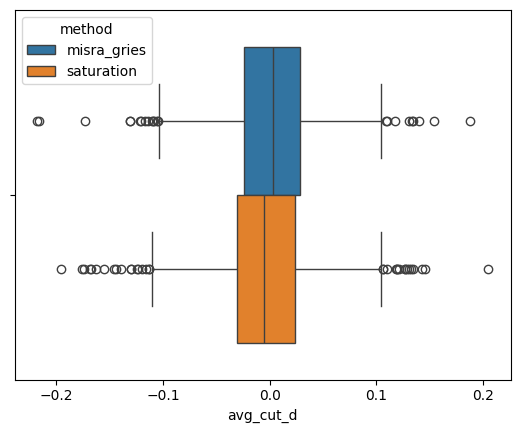

In [15]:
import seaborn as sns

sns.boxplot(data=avg_cuts[avg_cuts["method"] != "none"], x="avg_cut_d", hue="method")

## Probability of sampling the max cut (that has been discovered)

In [16]:
def _f(a: pd.DataFrame) -> pd.DataFrame:
    mc = a["cut"].max()
    a = a.set_index("cut").loc[mc]
    return a


max_cuts = (
    cuts[["hid", "method", "mae/e", "mae/e_delta", "cut", "count"]]
    .groupby(["hid"])
    .apply(_f, include_groups=False)
)
max_cuts.reset_index(inplace=True)

In [17]:
p, lst = max_cuts.pivot(index="hid", columns="method"), []
for m in max_cuts["method"].unique():
    count_pc = p["count"][m] / p["count"]["none"] * 100
    lst.append(pd.DataFrame({"method": m, "count_pc": count_pc}))
a = pd.concat(lst)
a = a.pivot(columns="method")
max_cuts = p.join(a).stack(future_stack=True).reset_index()
max_cuts

,hid,method,cut,mae/e,mae/e_delta,count,count_pc
0,binaryoptimization/maxcut/biqmac/ising-hams/1-...,misra_gries,6,0.013032,0.015404,2583,102.949382
1,binaryoptimization/maxcut/biqmac/ising-hams/1-...,none,6,-0.002372,0.000000,2509,100.000000
2,binaryoptimization/maxcut/biqmac/ising-hams/1-...,saturation,6,0.029170,0.031542,2558,101.952969
3,binaryoptimization/maxcut/biqmac/ising-hams/1-...,misra_gries,6,0.014765,0.017137,2524,97.829457
4,binaryoptimization/maxcut/biqmac/ising-hams/1-...,none,6,-0.002372,0.000000,2580,100.000000
...,...,...,...,...,...,...,...
3817,binaryoptimization/maxcut/ciqube/ratio912-hams...,none,9,0.167643,0.000000,37,100.000000
3818,binaryoptimization/maxcut/ciqube/ratio912-hams...,saturation,9,0.165776,-0.001867,32,86.486486
3819,binaryoptimization/maxcut/random/ham-graph-sta...,misra_gries,9,0.437925,-0.019833,8,100.000000
3820,binaryoptimization/maxcut/random/ham-graph-sta...,none,9,0.457759,0.000000,8,100.000000


In [18]:
def _print_col_stats(msg: str, s: pd.Series):
    d = s.describe()
    txt = f"count: {len(s)} | "
    txt += " | ".join(f"{k}: {v:>6.2f}%" for k, v in zip(d.index, d) if k != "count")
    print(msg, "|", txt)


for method in max_cuts["method"].unique():
    if method == "none":
        continue
    d = max_cuts[max_cuts["method"] == method]
    print("Method:", method)
    _print_col_stats("    Max cut prob. vs. baseline ", d["count_pc"])

Method: misra_gries
    Max cut prob. vs. baseline  | count: 1274 | mean: 100.89% | std:  16.87% | min:   8.33% | 25%:  95.70% | 50%: 100.04% | 75%: 104.08% | max: 300.00%
Method: saturation
    Max cut prob. vs. baseline  | count: 1274 | mean: 101.35% | std:  18.95% | min:  35.00% | 25%:  95.34% | 50%:  99.81% | 75%: 104.39% | max: 378.57%


<Axes: xlabel='count_pc', ylabel='method'>

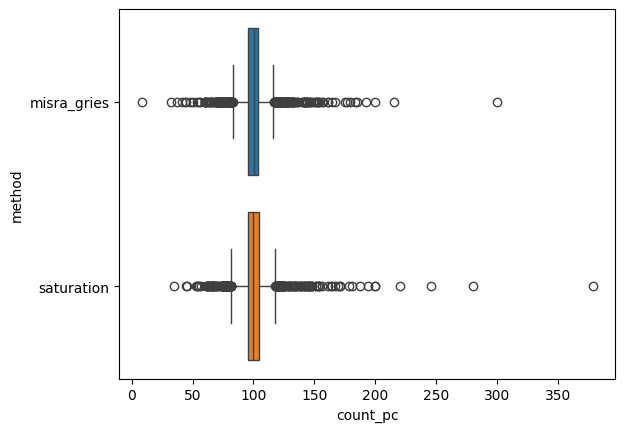

In [19]:
import seaborn as sns

sns.boxplot(
    data=max_cuts[max_cuts["method"] != "none"],
    x="count_pc",
    y="method",
    hue="method",
)

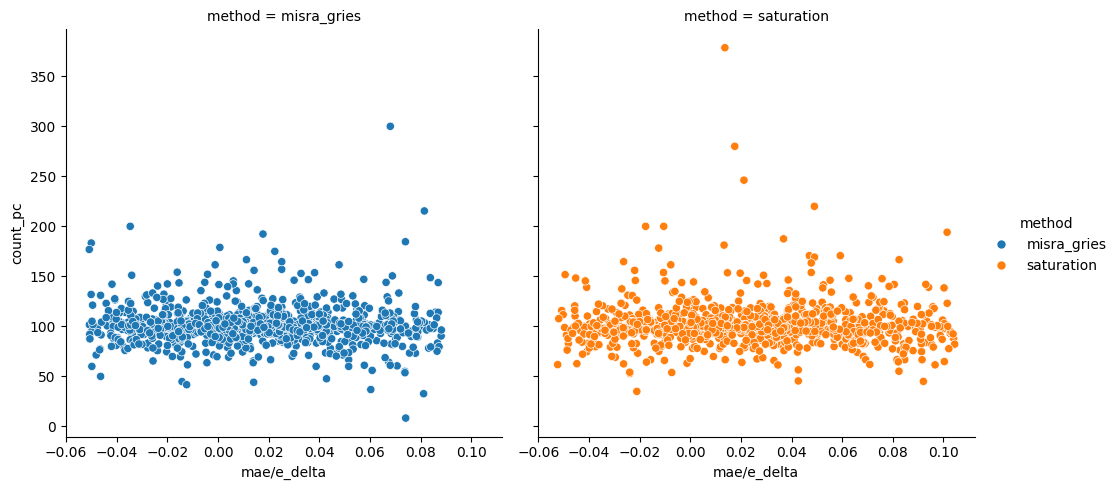

In [20]:
sns.relplot(
    data=max_cuts[max_cuts["method"] != "none"],
    x="mae/e_delta",
    y="count_pc",
    col="method",
    hue="method",
)

## Cut value distribution difference (single example)

<Axes: xlabel='cut', ylabel='count'>

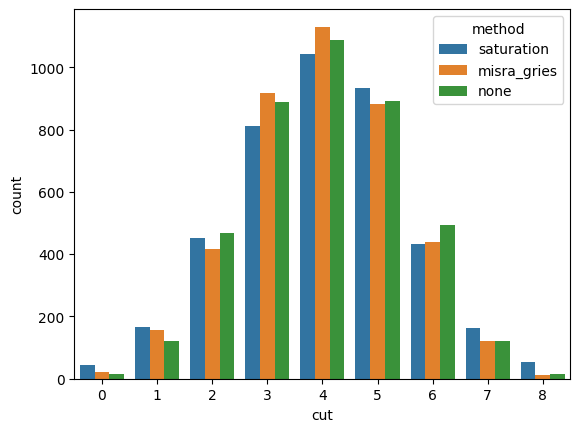

In [21]:
import seaborn as sns

hid = "binaryoptimization/maxcut/biqmac/rudy-hams/3-w01_100.6-9"
data = (
    cuts[cuts["hid"] == hid]
    .copy()
    .set_index("sampling_jid")
    .join(
        df[df["hid"] == hid].set_index("sampling_jid"),
        on="sampling_jid",
        how="inner",
        rsuffix="___",
    )
    .reset_index()
)
data.drop([c for c in data.columns if c.endswith("___")], axis=1, inplace=True)
data = data[["count", "cut", "method"]]
data.set_index(["cut"], inplace=True)

sns.barplot(data=data, x="cut", y="count", hue="method")

## Pareto shenanigans

In [22]:
import numpy as np


def is_pareto(arr: np.ndarray) -> np.ndarray:
    """
    `arr` must be a `(N, 2)` array. Returns a boolean array of the same length
    as `arr` which marks the entries that are Pareto optimal.

    Warning:
        The direction of the optimum is assumed to be north-east.
    """
    argsort0, mask = np.argsort(arr[:, 0])[::-1], np.full(len(arr), False)
    i = argsort0[0]  # Index of the last Pareto point
    mask[i] = True
    for j in argsort0:
        # Current point is in the south-east quadrant of the last Pareto point
        mask[j] = arr[j][1] >= arr[i][1]
        if mask[j]:
            i = j
    return mask


def _f(a: pd.DataFrame) -> pd.DataFrame:
    a["pareto"] = is_pareto(np.array(a[["cut", "prob"]]))
    return a


cuts_pareto = cuts.groupby("sampling_jid").apply(_f, include_groups=False)
cuts_pareto.reset_index(inplace=True)
cuts_pareto.drop("level_1", axis=1, inplace=True)
cuts_pareto = cuts_pareto[cuts_pareto["pareto"]]
cuts_pareto

,sampling_jid,hid,cut,count,prob,simulation_jid,reordering_jid,method,n_terms,n_qubits,depth,time,mae/e,mae/e_delta,pareto
5,00097df53eaac544a21e341ceb11649e83a10541,binaryoptimization/maxcut/biqmac/rudy-hams/9-p...,6,1402,0.342285,f9b74b283fcfbbea6c9d99404db40bc6d01ae7a4,8dce21d556e7b7dead392a91c2738a89f4b654cd,saturation,10,92,45,2.048,0.052701,0.002688,True
6,00097df53eaac544a21e341ceb11649e83a10541,binaryoptimization/maxcut/biqmac/rudy-hams/9-p...,7,521,0.127197,f9b74b283fcfbbea6c9d99404db40bc6d01ae7a4,8dce21d556e7b7dead392a91c2738a89f4b654cd,saturation,10,92,45,2.048,0.052701,0.002688,True
12,001a9dc0828d0c33eaebe2a93f7448f827d25d56,binaryoptimization/maxcut/biqmac/rudy-hams/3-g...,5,1236,0.301758,7d1bcaeb39523419778d350ac1fb31ef9c285fe6,8bef4ac76fab1d163e955313ad3c92d251188c83,saturation,10,61,40,2.041,0.148372,0.091364,True
13,001a9dc0828d0c33eaebe2a93f7448f827d25d56,binaryoptimization/maxcut/biqmac/rudy-hams/3-g...,6,1201,0.293213,7d1bcaeb39523419778d350ac1fb31ef9c285fe6,8bef4ac76fab1d163e955313ad3c92d251188c83,saturation,10,61,40,2.041,0.148372,0.091364,True
14,001a9dc0828d0c33eaebe2a93f7448f827d25d56,binaryoptimization/maxcut/biqmac/rudy-hams/3-g...,7,476,0.116211,7d1bcaeb39523419778d350ac1fb31ef9c285fe6,8bef4ac76fab1d163e955313ad3c92d251188c83,saturation,10,61,40,2.041,0.148372,0.091364,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23746,fff4f59d548a1609b78c9bb953b79e4de4e10331,binaryoptimization/maxcut/biqmac/rudy-hams/10-...,5,1587,0.387451,cef7b4c304ab4e6a8bdccd696024a65589775c39,f4070b868c61b24f2a973a34d4a3a7dc64b6d9a2,none,9,98,65,2.069,0.091613,0.000000,True
23747,fff4f59d548a1609b78c9bb953b79e4de4e10331,binaryoptimization/maxcut/biqmac/rudy-hams/10-...,6,1010,0.246582,cef7b4c304ab4e6a8bdccd696024a65589775c39,f4070b868c61b24f2a973a34d4a3a7dc64b6d9a2,none,9,98,65,2.069,0.091613,0.000000,True
23750,fff76f3ea5dcff9419d087096b6e1429bec2572f,binaryoptimization/maxcut/biqmac/rudy-hams/1-p...,4,1204,0.293945,14baa84f1ef2139f2a108464a66f6f719c4161fd,568eb6baea85c43e57a946751328669cb725eb87,saturation,9,97,30,1.683,0.089756,-0.025840,True
23752,fff76f3ea5dcff9419d087096b6e1429bec2572f,binaryoptimization/maxcut/biqmac/rudy-hams/1-p...,6,777,0.189697,14baa84f1ef2139f2a108464a66f6f719c4161fd,568eb6baea85c43e57a946751328669cb725eb87,saturation,9,97,30,1.683,0.089756,-0.025840,True


In [23]:
def _f(a: pd.DataFrame) -> pd.DataFrame:
    return pd.DataFrame({"avg_cut": [(a["cut"] * a["prob"]).sum()]})


avg_cuts_pareto = cuts_pareto.groupby(["hid", "method"]).apply(_f, include_groups=False)
avg_cuts_pareto.reset_index(inplace=True)
avg_cuts_pareto.drop("level_2", axis=1, inplace=True)

avg_cuts_pareto

,hid,method,avg_cut
0,binaryoptimization/maxcut/biqmac/ising-hams/1-...,misra_gries,3.783691
1,binaryoptimization/maxcut/biqmac/ising-hams/1-...,none,3.675293
2,binaryoptimization/maxcut/biqmac/ising-hams/1-...,saturation,3.747070
3,binaryoptimization/maxcut/biqmac/ising-hams/1-...,misra_gries,3.697266
4,binaryoptimization/maxcut/biqmac/ising-hams/1-...,none,3.779297
...,...,...,...
3817,binaryoptimization/maxcut/ciqube/ratio912-hams...,none,4.010986
3818,binaryoptimization/maxcut/ciqube/ratio912-hams...,saturation,3.978271
3819,binaryoptimization/maxcut/random/ham-graph-sta...,misra_gries,2.879639
3820,binaryoptimization/maxcut/random/ham-graph-sta...,none,3.796631


In [24]:
dfp, lst = avg_cuts_pareto.pivot(index="hid", columns="method"), []

for m in avg_cuts_pareto["method"].unique():
    avg_cut_d = dfp["avg_cut"][m] - dfp["avg_cut"]["none"]
    lst.append(pd.DataFrame({"method": m, "avg_cut_d": avg_cut_d}))

a = pd.concat(lst)
a = a.pivot(columns="method")
avg_cuts_pareto = dfp.join(a).stack(future_stack=True).reset_index()

avg_cuts_pareto

,hid,method,avg_cut,avg_cut_d
0,binaryoptimization/maxcut/biqmac/ising-hams/1-...,misra_gries,3.783691,0.108398
1,binaryoptimization/maxcut/biqmac/ising-hams/1-...,none,3.675293,0.000000
2,binaryoptimization/maxcut/biqmac/ising-hams/1-...,saturation,3.747070,0.071777
3,binaryoptimization/maxcut/biqmac/ising-hams/1-...,misra_gries,3.697266,-0.082031
4,binaryoptimization/maxcut/biqmac/ising-hams/1-...,none,3.779297,0.000000
...,...,...,...,...
3817,binaryoptimization/maxcut/ciqube/ratio912-hams...,none,4.010986,0.000000
3818,binaryoptimization/maxcut/ciqube/ratio912-hams...,saturation,3.978271,-0.032715
3819,binaryoptimization/maxcut/random/ham-graph-sta...,misra_gries,2.879639,-0.916992
3820,binaryoptimization/maxcut/random/ham-graph-sta...,none,3.796631,0.000000


In [25]:
def _print_col_stats(msg: str, s: pd.Series):
    d = s.describe()
    txt = f"count: {len(s)} | "
    txt += " | ".join(f"{k}: {v:>+.2e}" for k, v in zip(d.index, d) if k != "count")
    print(msg, "|", txt)


for method in avg_cuts_pareto["method"].unique():
    if method == "none":
        continue
    d = avg_cuts_pareto[avg_cuts_pareto["method"] == method]
    print("Method:", method)
    _print_col_stats("    Average cut.           ", d["avg_cut"])
    _print_col_stats("    Average cut diff.      ", d["avg_cut_d"])

Method: misra_gries
    Average cut.            | count: 1274 | mean: +3.31e+00 | std: +5.77e-01 | min: +1.35e+00 | 25%: +2.96e+00 | 50%: +3.38e+00 | 75%: +3.78e+00 | max: +4.71e+00
    Average cut diff.       | count: 1274 | mean: +6.62e-03 | std: +3.08e-01 | min: -1.52e+00 | 25%: -4.59e-02 | 50%: +5.25e-03 | 75%: +5.41e-02 | max: +1.94e+00
Method: saturation
    Average cut.            | count: 1274 | mean: +3.30e+00 | std: +5.65e-01 | min: +1.40e+00 | 25%: +2.95e+00 | 50%: +3.37e+00 | 75%: +3.76e+00 | max: +4.43e+00
    Average cut diff.       | count: 1274 | mean: -2.69e-04 | std: +3.33e-01 | min: -1.58e+00 | 25%: -6.03e-02 | 50%: -3.05e-03 | 75%: +5.17e-02 | max: +1.45e+00


<Axes: xlabel='avg_cut_d', ylabel='method'>

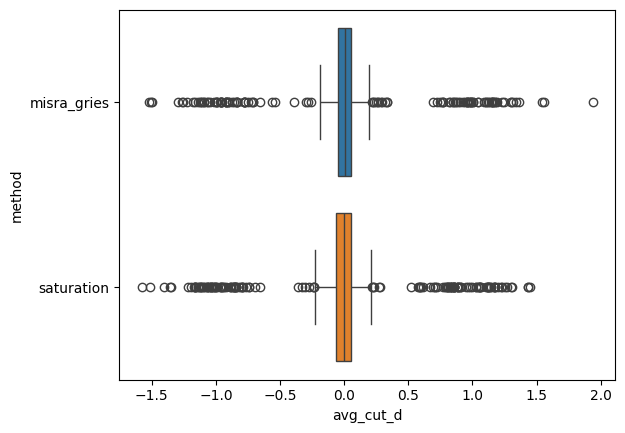

In [26]:
import seaborn as sns

sns.boxplot(
    data=avg_cuts_pareto[avg_cuts_pareto["method"] != "none"],
    x="avg_cut_d",
    y="method",
    hue="method",
)